#Plane wave beamforming

In [28]:
%matplotlib inline
import sys

import numpy as np
import matplotlib.pyplot as plt
sys.path.append("/Users/edwardlrichards/compAcoustics") 
import beamformers as bf

In [29]:
# experiment specifications
f = 200
c = 1500
spacing = 0.5  # lambda
numEl = 20
numLook = 1e3 

In [30]:
omega = 2 * np.pi * f
waveLength = c / f
arrayPosition = np.arange(numEl) * spacing * waveLength
thetaLook = np.r_[0 : np.pi : numLook * 1j] - (np.pi / 2)
W = np.exp(1j * np.sin(thetaLook)[:,None] * arrayPosition)

In [42]:
dataVector = W[398,:]
lookDirection = thetaLook[398]
K = np.outer(dataVector, dataVector.conj())
B_bart = bf.wnc(K, W, 8)
B_bart = 10 * np.log10(np.abs(B_bart))
B_bart -= np.max(B_bart)

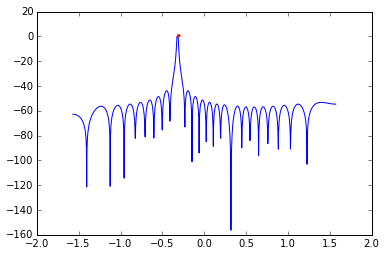

In [44]:
_ = plt.plot(thetaLook, B_bart)
_ = plt.plot(lookDirection, 1, 'r.')